# Chapter 3 - Forward Propagation

In [1]:
weight = 0.1

def neural_network(input, weight):
    prediction = input * weight
    return prediction

In [2]:
number_of_toes = [8.5, 9.5, 10, 9]

input = number_of_toes[0]

pred = neural_network(input,weight)
print(pred)

0.8500000000000001


The Dot Product - a measure of similarity between vectors
- By way of analogy: think of taking 'AND' between two simple vectors

In [6]:
a = [ 0, 1, 0, 1]
b = [ 1, 0, 1, 0]

def similarity(a, b):
    value = 0
    assert(len(a) == len(b))
    for i in range(len(a)):
        value += int((a[i] and b[i]))
    return value
similarity(a, b)

0

In [8]:
b = [ 1, 0, 1, 0]
c = [ 0, 1, 1, 0]
similarity(b,c)

1

Interpreting weights by way of analogy with AND, NOT, and OR

weights = [ 1, 0, 1] => if input[0] OR input[2]

weights = [ 0, 0, 1] => if input[2]

weights = [ 1, 0, -1] => if input[0] OR NOT input[2]

weights = [ -1, 0, -1] => if NOT input[0] OR NOT input[2]

weights = [ 0.5, 0, 1] => if BIG input[0] or input[2]

the network gives a high score of the inputs based on how similar they are to the weights.

In [10]:
# sloppy python code
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

weights = [0.1, 0.2, 0]

def neural_network(input, weights):
    pred = w_sum(input,weights)
    return pred

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
print(pred)

0.9800000000000001


In [11]:
# NumPy Code
import numpy as np

weights = np.array([0.1, 0.2, 0])

def neural_network(input, weights):
    pred = input.dot(weights)
    return pred

toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

input = np.array([toes[0],wlrec[0],nfans[0]])
pred = neural_network(input,weights)
print(pred)


0.9800000000000001


### Multiple Predictions from Single Input

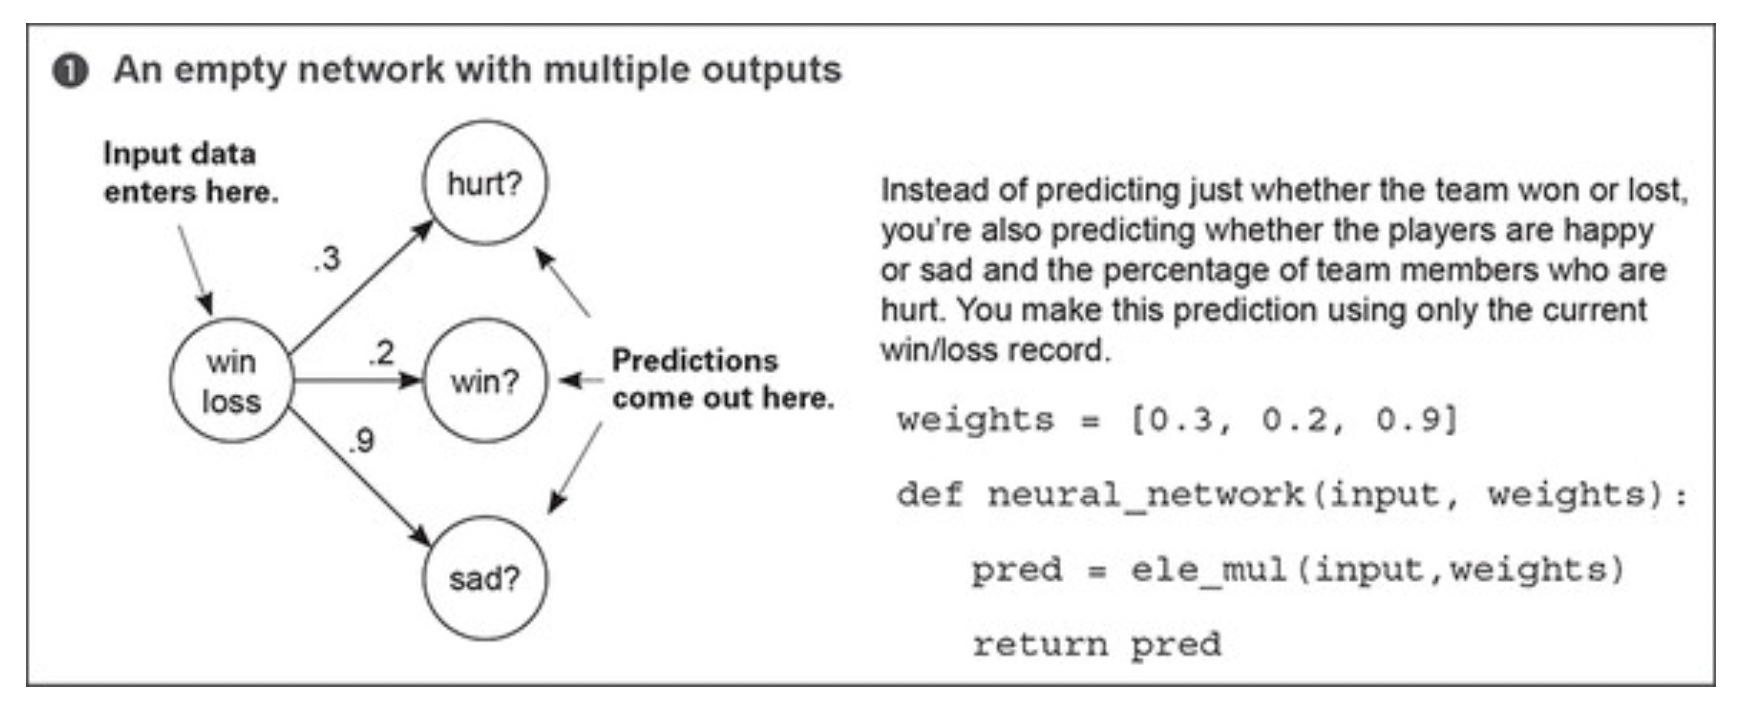

In [20]:
weights = np.array([0.3, 0.2, 0.9])
wlrec = np.array([0.65, 0.7, 0.22, 0.62])
input = wlrec[0]

def ele_mul(number, vector):
    output = np.zeros(len(vector))
    assert(len(output) == len(vector))
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output

def nn(input, weights):
    pred = ele_mul(input,weights)
    return pred

prediction = nn(input,weights)
prediction

array([0.195, 0.13 , 0.585])

### Multiple Inputs and Multiple Predictions (outputs)

Makes 3 weighted sums (dot products) to deliver 3 predictions

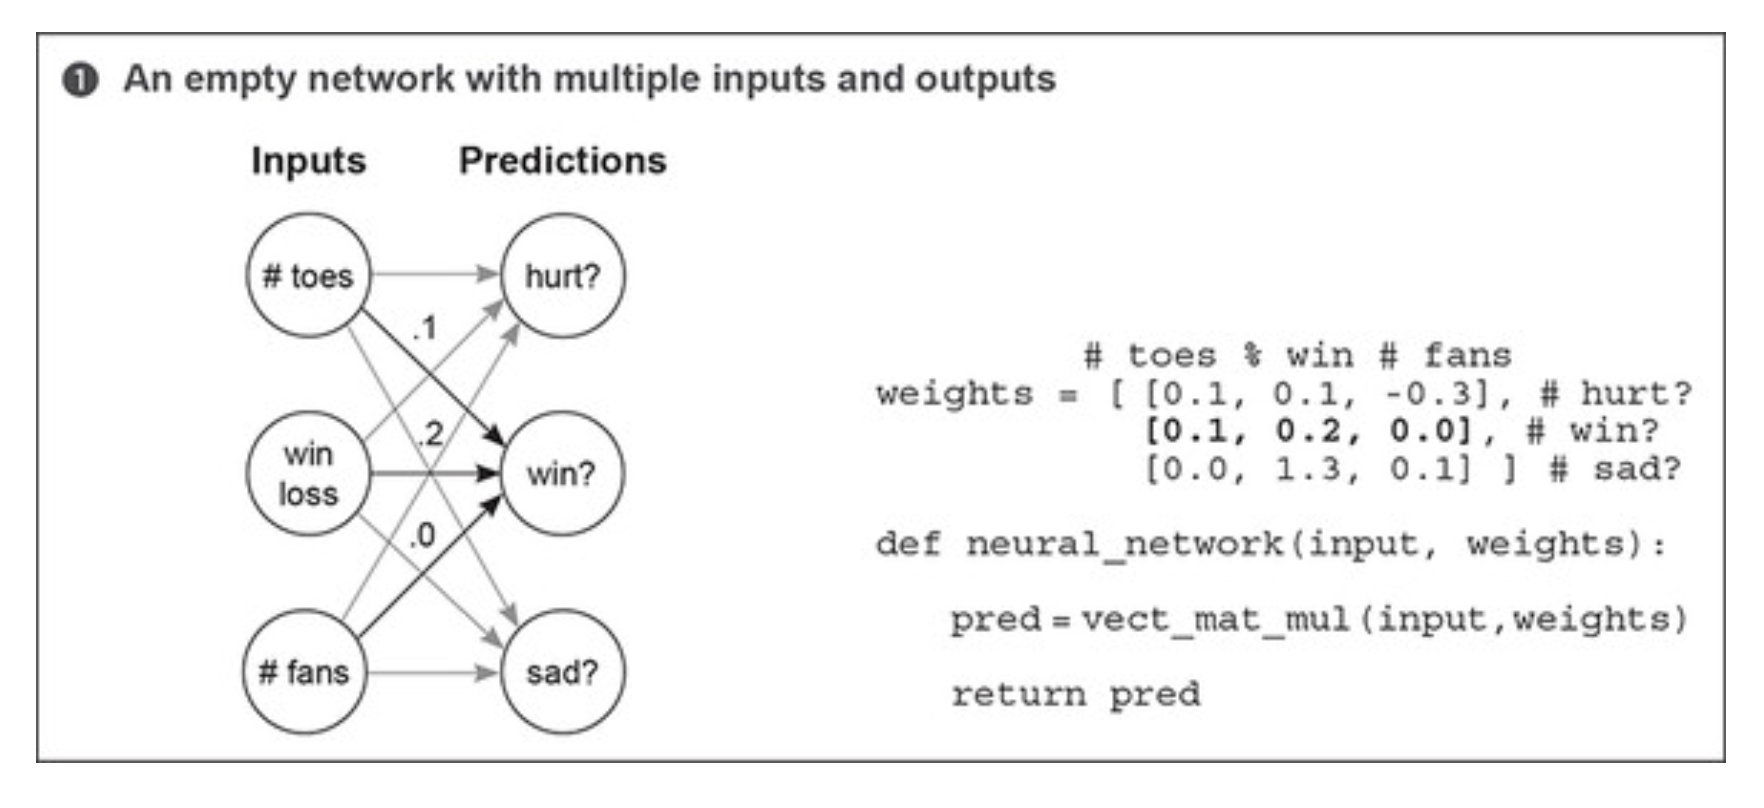

In [27]:
toes = [9.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = [toes[0], wlrec[0], nfans[0]]

           #toes %win #fans
weights = [ [0.1, 0.1, -0.3], # hurt?
            [0.1, 0.2, 0.0],  # win?
            [0.0, 1.3, 0.1] ] # sad?

In [31]:
def w_sum(vector_a, vector_b):
    assert(len(vector_a) == len(vector_b))
    amount = 0
    for i in range(len(vector_a)):
        amount += (vector_a[i] * vector_b[i])
    return amount

def vect_mat_mul(input, weights):
    output = []
    for i in range(len(weights)):
        assert(len(input) == len(weights[i]))
        output.append(w_sum(input, weights[i]))
    return output

In [34]:
# our 3 predictions
vect_mat_mul(input, weights)

[0.6550000000000001, 1.08, 0.9650000000000001]

## Hidden Layers
### Stacking NN

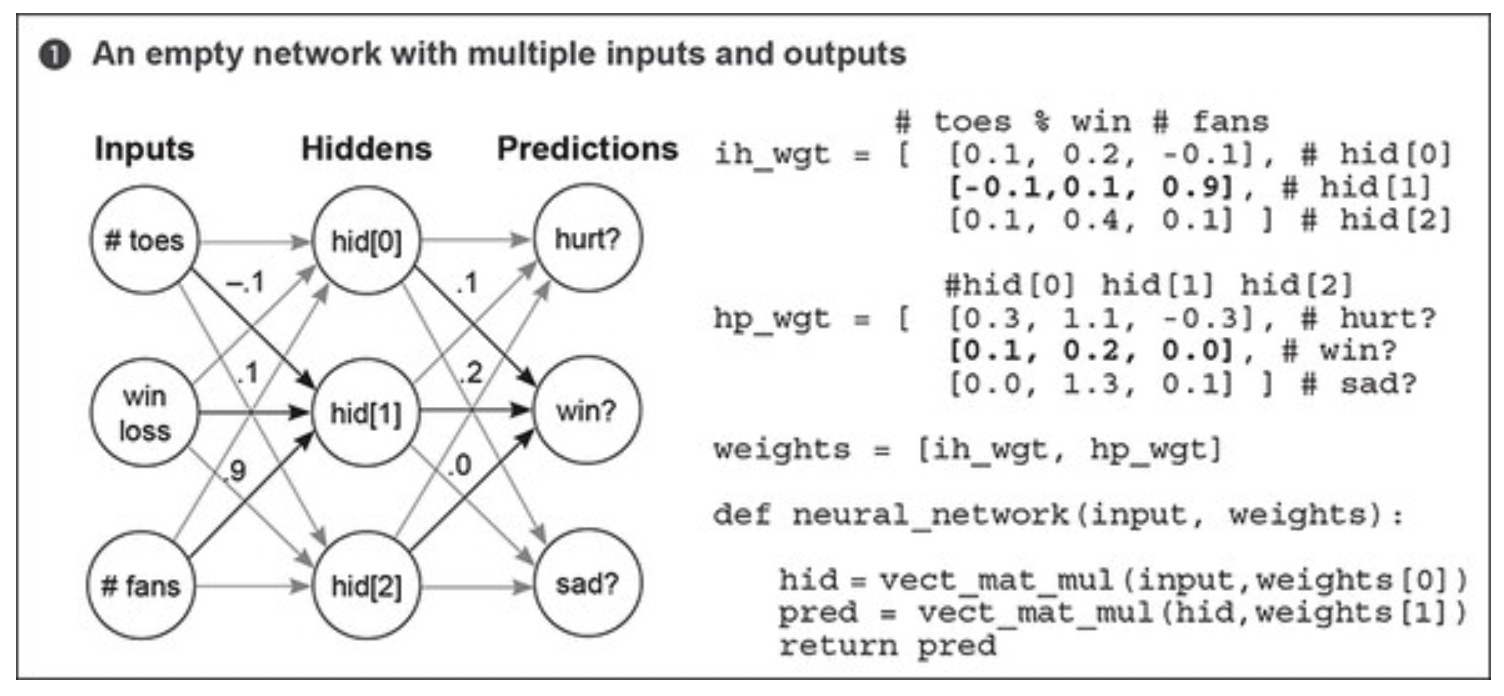

In [8]:
import numpy as np

# toes % win # fans
ih_wgt = np.array([
            [0.1, 0.2, -0.1], # hid[0]
            [-0.1,0.1, 0.9], # hid[1]
            [0.1, 0.4, 0.1]]).T # hid[2]


# hid[0] hid[1] hid[2]
hp_wgt = np.array([
            [0.3, 1.1, -0.3], # hurt?
            [0.1, 0.2, 0.0], # win?
            [0.0, 1.3, 0.1] ]).T # sad?

weights = [ih_wgt, hp_wgt]

def neural_network(input, weights):

    hid = input.dot(weights[0])
    pred = hid.dot(weights[1])
    return pred


toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65,0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

input = np.array([toes[0],wlrec[0],nfans[0]])

pred = neural_network(input,weights)
print(pred)

[0.2135 0.145  0.5065]


learning basic numpy

In [1]:
import numpy as np

A = [[6, 7],
      [8, 9]]
      
B = [[1, 3],
      [5, 7]]

print(np.dot(A,B))

print("----------")

print(np.dot(B,A))

[[41 67]
 [53 87]]
----------
[[30 34]
 [86 98]]


In [4]:
C = np.array([[1, 2],
              [3, 4]])
D = np.array([[5, 6],
              [7, 8]])
print(np.dot(C,D))
print("________")
print(np.dot(D,C))

[[19 22]
 [43 50]]
________
[[23 34]
 [31 46]]


In [5]:
C.dot(D)

array([[19, 22],
       [43, 50]])

In [7]:
E = np.array([9, 10])
D.dot(E)

array([105, 143])

In [9]:
F = np.array([1,2,3,4])
G = np.array([5,6,7,8])
F.dot(G)

70